In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('USA_Housing.csv')

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.shape

(5000, 7)

In [6]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [7]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


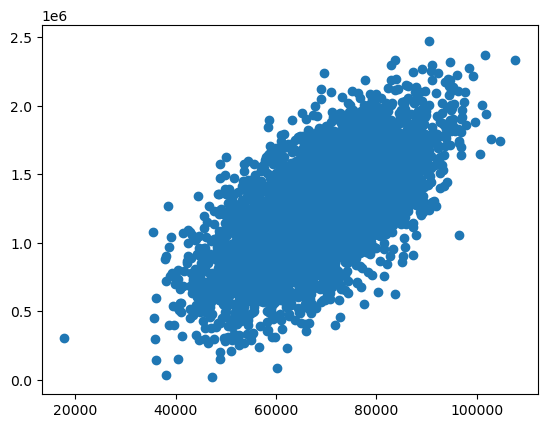

In [8]:
plt.scatter(df['Avg. Area Income'], df['Price'])
plt.show()

In [12]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [13]:
y = df['Price']
X = df[['Avg. Area Income','Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']]

In [14]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,79545.458574,5.682861,7.009188,23086.800503
1,79248.642455,6.002900,6.730821,40173.072174
2,61287.067179,5.865890,8.512727,36882.159400
3,63345.240046,7.188236,5.586729,34310.242831
4,59982.197226,5.040555,7.839388,26354.109472
...,...,...,...,...
4995,60567.944140,7.830362,6.137356,22837.361035
4996,78491.275435,6.999135,6.576763,25616.115489
4997,63390.686886,7.250591,4.805081,33266.145490
4998,68001.331235,5.534388,7.130144,42625.620156


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [17]:
sc = StandardScaler()
sc.fit(X)
X_scaled = sc.transform(X)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25,
                                                    random_state = 1)

In [22]:
X_train.shape

(3750, 4)

In [24]:
y_train.shape

(3750,)

In [28]:
a,b, c, d = [6, 8, 9, 4]

In [29]:
a

6

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [33]:
lr_model.coef_

array([230404.28879862, 163786.71061667, 122262.44196015, 150243.4083813 ])

In [34]:
lr_model.intercept_

1232499.0776531221

In [35]:
X_test

array([[ 0.60329152,  0.77228085, -0.38127118,  0.67648764],
       [ 0.71354205,  0.18056018,  0.17734056,  0.89886006],
       [-0.09016572, -0.16471795, -1.90575497, -0.08097686],
       ...,
       [-0.89487957,  0.69887882,  0.34620818,  0.1662726 ],
       [-0.26882116, -1.07916462, -2.82417116,  1.8776462 ],
       [ 0.79104163,  1.43330023,  0.52637956,  0.73245487]])

In [36]:
y_test

2764    1.413580e+06
4767    1.618721e+06
3814    8.413925e+05
3499    8.814439e+05
2735    1.174748e+06
            ...     
3015    1.426696e+06
1891    2.007556e+06
2773    1.082589e+06
3803    9.957216e+05
3301    1.890056e+06
Name: Price, Length: 1250, dtype: float64

In [38]:
y_pred = lr_model.predict(X_test)

In [40]:
lr_model.score(X_test, y_test)

0.9198837224059672

In [41]:
lr_model.score(X_train, y_train)

0.9172965251823658

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [44]:
mse = mean_squared_error(y_test, y_pred)
mse

10605006369.911642

In [45]:
rmse = mean_squared_error(y_test, y_pred, squared = False)
rmse

102980.61162137095

In [46]:
mae = mean_absolute_error(y_test, y_pred)
mae

82940.50745889553

In [70]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.svm import SVR

In [91]:
dtr_model = DecisionTreeRegressor(random_state =12, max_depth = 5)
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=12)

In [92]:
dtr_model.score(X_test, y_test)

0.6823854411900154

In [93]:
dtr_model.score(X_train, y_train)


0.7136096938924501

In [94]:
X.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Area Population'],
      dtype='object')

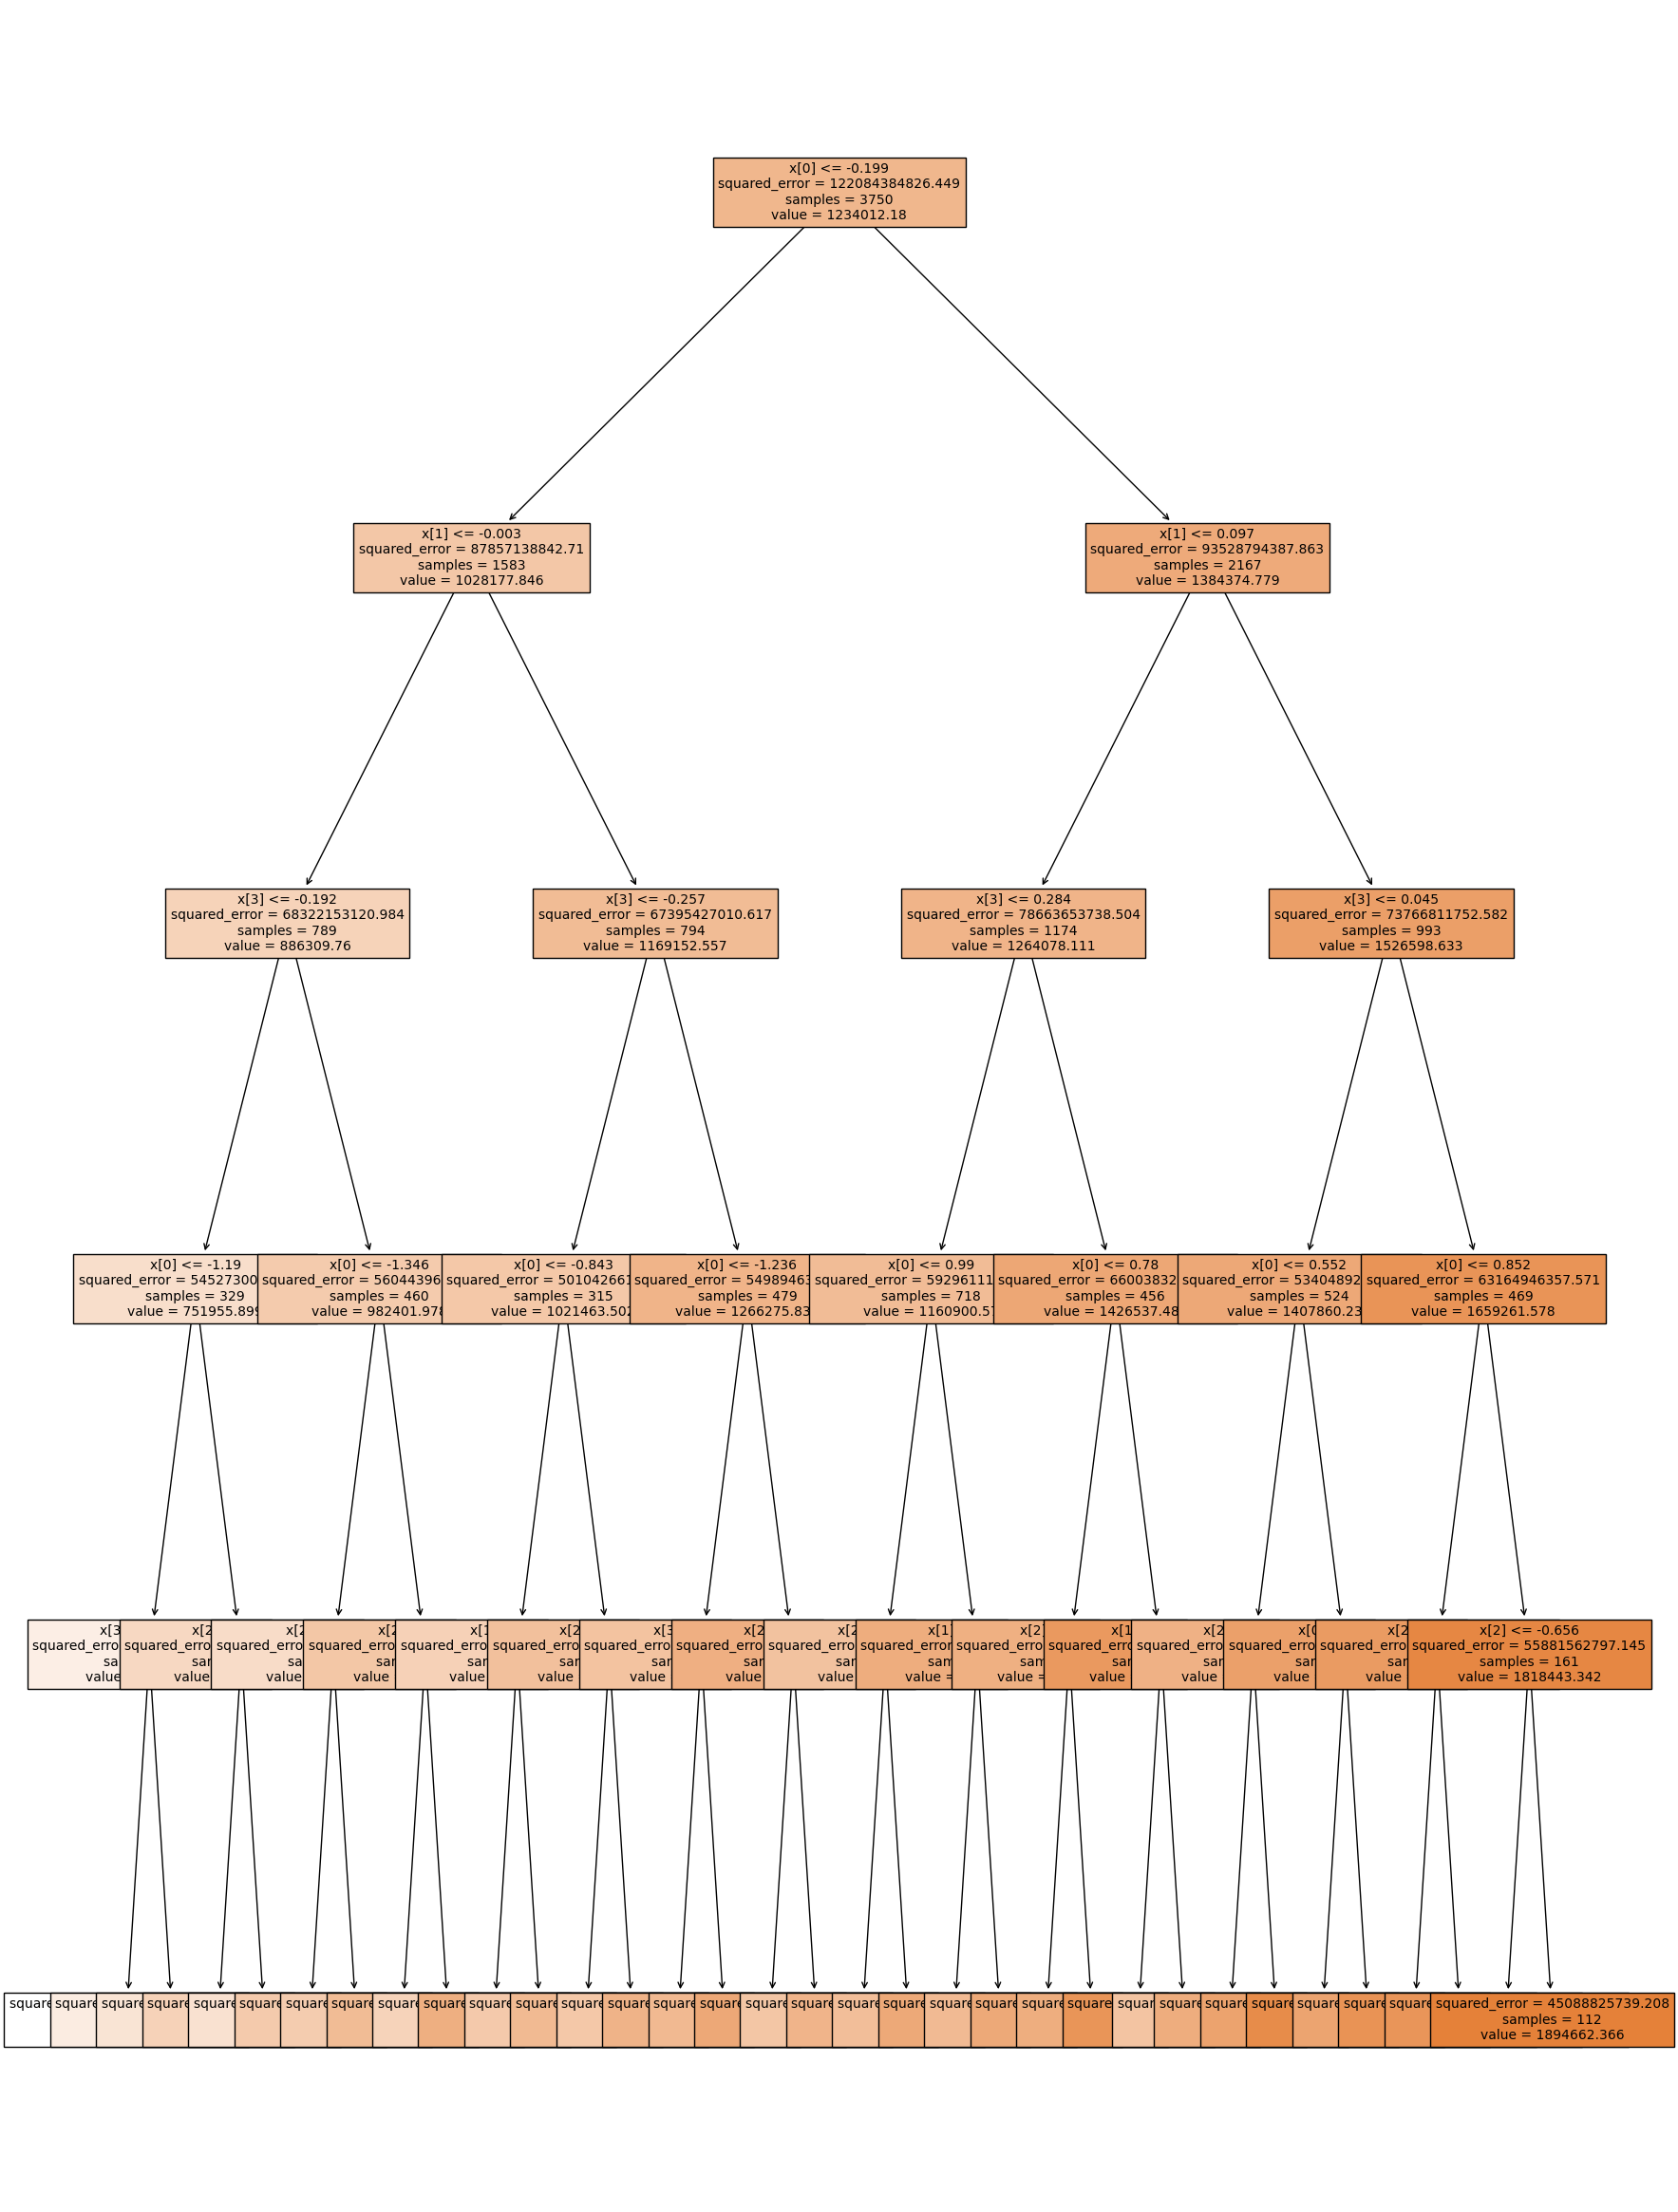

In [98]:
plt.figure(figsize = (20,30))
plot_tree(dtr_model,feature_names = X.columns.tolist(), filled = True, fontsize = 10)
plt.show()

In [96]:
plot_tree?

Signature:
plot_tree(
    decision_tree,
    *,
    max_depth=None,
    feature_names=None,
    class_names=None,
    label='all',
    filled=False,
    impurity=True,
    node_ids=False,
    proportion=False,
    rounded=False,
    precision=3,
    ax=None,
    fontsize=None,
)
Docstring:
Plot a decision tree.

The sample counts that are shown are weighted with any sample_weights that
might be present.

The visualization is fit automatically to the size of the axis.
Use the ``figsize`` or ``dpi`` arguments of ``plt.figure``  to control
the size of the rendering.

Read more in the :ref:`User Guide <tree>`.

.. versionadded:: 0.21

Parameters
----------
decision_tree : decision tree regressor or classifier
    The decision tree to be plotted.

max_depth : int, default=None
    The maximum depth of the representation. If None, the tree is fully
    generated.

feature_names : list of str, default=None
    Names of each of the features.
    If None, generic names will be used ("x[0]", "x[

In [111]:
svr_model = SVR(kernel = 'linear', C = 2.0)
svr_model.fit(X_train, y_train)

SVR(C=2.0, kernel='linear')

In [112]:
svr_model.score(X_test, y_test)

0.029275500149567035

In [113]:
svr_model.score(X_train, y_train)

0.029706032244437464

In [114]:
from sklearn.neighbors import KNeighborsRegressor

In [145]:
knn_model = KNeighborsRegressor( weights = 'distance',n_neighbors = 7)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7, weights='distance')

In [146]:
knn_model.score(X_test, y_test)

0.8935159609222885

In [147]:
knn_model.score(X_train, y_train)

1.0

In [148]:
knn_model.predict(X_test)

array([1565973.96538946, 1500690.14697611,  937606.24895951, ...,
       1243586.62963305,  974998.36833872, 1768582.72374119])

In [149]:
X_test.shape

(1250, 4)

In [150]:
income = 79500
age = 5
rooms = 7
pop = 23867

ins = [[income, age, rooms, pop]]
ins = np.array(ins)
ins_scaled = sc.transform(ins)
ins_scaled

knn_model.predict(ins_scaled)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1118719.40220535])

In [160]:
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_dataset.csv')

In [161]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [163]:
df.to_csv('Liver_disease.csv', index = False)